**Mendapatkan gambaran besar**

Sebagai usaha untuk menerapkan kebijakan yang dapat mengurangi pertambahan kasus COVID-19 di Jakarta, Pemerintah Provinsi DKI Jakarta berencana untuk melakukan beberapa analisa sebagai landasan pengambilan kebijakan. Beberapa analisa yang perlu dilakukan diantaranya adalah memprediksi pertumbuhan kasus COVID-19 di Jakarta dan menguji efektivitas dari pemberian vaksin yang sudah diberikan kepada sejumlah pejabat publik, petugas kesehatan, dan orang lanjut usia. Di dalam pengolahan data ini, Pemerintah Provinsi DKI Jakarta meminta bantuan dari peserta kelas Kecerdasan Buatan IBDA2032 untuk membantu mereka melakukan analisa tersebut.

# 1. Regresi Linear

Seperti biasa, langkah pertama adalah untuk import dan membaca dataset.

**Panggil Data**

In [219]:
import pandas as pd
from sklearn.linear_model import LinearRegression
dataset = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta (3).xlsx')
dataset.head()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0
2,2020-03-03,0,0,2,2,1,0,0,2,3,2,0,0,0,0,1,0,0,2,3,2
3,2020-03-04,0,0,2,2,1,0,0,2,3,2,0,0,0,0,0,0,0,0,0,0
4,2020-03-05,0,0,2,2,3,0,0,4,7,4,0,0,0,0,2,0,0,2,4,2


**1. Model Regresi**

Klien meminta agar dibuatkan model regresi berdasarkan hari untuk kasus Positif Harian Jakarta (data diambil dari kolom Tanggal Positif Harian (Jakarta) dari sheet Data Indonesia dan Jakarta) :

<li> Mulai dari 1 Maret 2020 semenjak kasus pertama
<li> Mulai dari 1 Januari 2021 semenjak awal tahun baru
<li> Mulai dari 9 Februari 2021 semenjak diadakan PPKM jilid 2 Analisa



**cek nilai null**

Sebelum membuat model, langkah pertama yang perlu dilakukan adalah mengecek apakah ada data yang kosong di dalam dataframe dengan menggunakan .info() pada dataframe.<br>

Hasil menunjukkan ternyata ada beberapa nilai NaN, sehingga data yang kosong tersebut harus diisi terlebih dahulu. <br>
Namun, jika dilihat dari info tabel, hanya ada 1 baris yang null, sehingga dapat kita anggap tidak begitu signifikan. 

In [220]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          407 non-null    datetime64[ns]
 1   Meninggal (Indonesia)            407 non-null    int64         
 2   Sembuh (Indonesia)               407 non-null    int64         
 3   Dirawat (Indonesia)              407 non-null    int64         
 4   Positif (Indonesia)              407 non-null    int64         
 5   Meninggal (Jakarta)              407 non-null    int64         
 6   Sembuh (Jakarta)                 407 non-null    int64         
 7   Self-Isolation (Jakarta)         407 non-null    int64         
 8   Dirawat (Jakarta)                407 non-null    int64         
 9   Positif (Jakarta)                407 non-null    int64         
 10  Positif Aktif (Jakarta)          407 non-null    int64        

Plot tanggal pada sumbu X dan jumlah positif harian pada sumbu Y

In [221]:
x_y = dataset.iloc[:,[0,19]].dropna()
x = x_y.iloc[:,0].values
y = x_y.iloc[:,1].values
x

array(['2020-03-01T00:00:00.000000000', '2020-03-02T00:00:00.000000000',
       '2020-03-03T00:00:00.000000000', '2020-03-04T00:00:00.000000000',
       '2020-03-05T00:00:00.000000000', '2020-03-06T00:00:00.000000000',
       '2020-03-07T00:00:00.000000000', '2020-03-08T00:00:00.000000000',
       '2020-03-09T00:00:00.000000000', '2020-03-10T00:00:00.000000000',
       '2020-03-11T00:00:00.000000000', '2020-03-12T00:00:00.000000000',
       '2020-03-13T00:00:00.000000000', '2020-03-14T00:00:00.000000000',
       '2020-03-15T00:00:00.000000000', '2020-03-16T00:00:00.000000000',
       '2020-03-17T00:00:00.000000000', '2020-03-18T00:00:00.000000000',
       '2020-03-19T00:00:00.000000000', '2020-03-20T00:00:00.000000000',
       '2020-03-21T00:00:00.000000000', '2020-03-22T00:00:00.000000000',
       '2020-03-23T00:00:00.000000000', '2020-03-24T00:00:00.000000000',
       '2020-03-25T00:00:00.000000000', '2020-03-26T00:00:00.000000000',
       '2020-03-27T00:00:00.000000000', '2020-03-28

In [222]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder() 
x = np.reshape(x,(-1,1))
x = ordinal_encoder.fit_transform(x) #Mengubah tanggal menjadi integer yang unik
x_train = x[:int(0.9 * len(x))]
x_test = x[int(0.9 * len(x)):]
y_train = y[:int(0.9 * len(x))] #Menggambil 90% data untuk train dan 10% untuk test
y_test = y[int(0.9 * len(x)):]

plot berikut berdasarkan data mulai dari 1 Maret 2020 semenjak kasus pertama

Intercept when fit_intercept=True : -479.51530
Intercept when fit_intercept=False : 0.00000


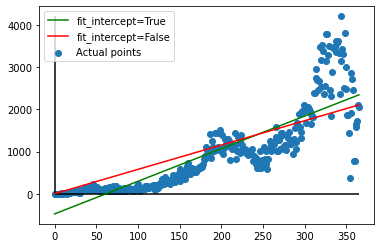

In [223]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt


lr_fi_true = LinearRegression(fit_intercept=True) #Membuat model tanpa dilakukan centering
lr_fi_false = LinearRegression(fit_intercept=False) #Membuat model menggunakan centering

lr_fi_true.fit(x_train, y_train)
lr_fi_false.fit(x_train, y_train)

print('Intercept when fit_intercept=True : {:.5f}'.format(lr_fi_true.intercept_)) #nilai (gradien garis) dari rumus
print('Intercept when fit_intercept=False : {:.5f}'.format(lr_fi_false.intercept_))

lr_fi_true_yhat = np.dot(x_train, lr_fi_true.coef_) + lr_fi_true.intercept_
lr_fi_false_yhat = np.dot(x_train, lr_fi_false.coef_) + lr_fi_false.intercept_ #Nilai hasil pred regresi

plt.scatter(x_train, y_train, label='Actual points')
plt.plot(x_train, lr_fi_true_yhat, 'g-', label='fit_intercept=True')
plt.plot(x_train, lr_fi_false_yhat, 'r-', label='fit_intercept=False')
plt.legend()

plt.vlines(0, 0, y_train.max())
plt.hlines(0, x_train.min(), x_train.max())

plt.show()

In [224]:
y_true_pred= lr_fi_true.predict(x_test)
y_false_pred= lr_fi_false.predict(x_test)
print(y_true_pred)
print(y_false_pred)

[2354.98113631 2362.72566209 2370.47018787 2378.21471365 2385.95923943
 2393.70376521 2401.44829099 2409.19281677 2416.93734255 2424.68186833
 2432.42639411 2440.17091989 2447.91544567 2455.65997145 2463.40449723
 2471.14902301 2478.89354879 2486.63807457 2494.38260035 2502.12712613
 2509.87165191 2517.61617769 2525.36070347 2533.10522925 2540.84975503
 2548.59428081 2556.33880658 2564.08333236 2571.82785814 2579.57238392
 2587.3169097  2595.06143548 2602.80596126 2610.55048704 2618.29501282
 2626.0395386  2633.78406438 2641.52859016 2649.27311594 2657.01764172
 2664.7621675 ]
[2114.23952926 2120.01614    2125.79275073 2131.56936147 2137.3459722
 2143.12258294 2148.89919368 2154.67580441 2160.45241515 2166.22902588
 2172.00563662 2177.78224735 2183.55885809 2189.33546883 2195.11207956
 2200.8886903  2206.66530103 2212.44191177 2218.2185225  2223.99513324
 2229.77174398 2235.54835471 2241.32496545 2247.10157618 2252.87818692
 2258.65479765 2264.43140839 2270.20801913 2275.98462986 2281.

In [225]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_true_pred)**(1/2))
print(mean_squared_error(y_test, y_false_pred)**(1/2))

1353.9070734921818
1089.6725817841582


In [226]:
print(lr_fi_true.score(x_train,y_train)) 
print(lr_fi_false.score(x_train,y_train)) #Nilai akurasi regresi

0.7258172716765169
0.6632447605826879


In [227]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, lr_fi_true_yhat)**(1/2)) #Nilai mean squared error (lebih kecil lebih baik)
print(mean_squared_error(y_train, lr_fi_false_yhat)**(1/2))

502.9097653091088
557.3489695814673


Dari scoring kita melihat bahwa tanpa adanya fit_intercept, akurasi dari model sangat tidak akurat. 

Sekarang untuk mengambil data dari 1 Januari 2021 dan 9 Februari 2021

In [228]:
index_jan = dataset[dataset["Tanggal"]=="01/01/2021"].index.values #Mencari index awal data 
index_feb = dataset[dataset["Tanggal"]=="02/09/2021"].index.values #Mencari index akhir data
index_jan

array([306])

In [229]:
x_jan = x[index_jan[0]:] #Slicing data berdasarkan index yang sudah didapat
x_feb = x[index_feb[0]:]
y_jan = y[index_jan[0]:]
y_feb = y[index_feb[0]:]
ordinal_encoder = OrdinalEncoder()
x_jan = np.reshape(x_jan,(-1,1))
x_feb = np.reshape(x_feb,(-1,1))
x_jan = ordinal_encoder.fit_transform(x_jan)  #Mengubah data tanggal menjadi integer unik
x_feb = ordinal_encoder.fit_transform(x_feb)

In [230]:
x_train_jan = x_jan[:int(0.8*len(x_jan))] #Mengambil 80% data train dan 20% data test
x_test_jan = x_jan[int(0.8*len(x_jan)):] 
y_train_jan = y_jan[:int(0.8*len(y_jan))] #Mengambil 80% data train dan 20% data test
y_test_jan = y_jan[int(0.8*len(y_jan)):] 
#Untuk data dari tanggal 9 Februari tidak di split karena data terlalu sedikit (hanya sekitar 50 data)

Berikut garis regresi untuk data dari 1 Januari 2021 

Intercept when fit_intercept=True : 3175.15185
Intercept when fit_intercept=False : 0.00000


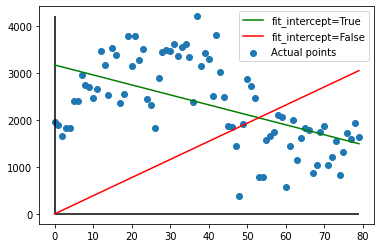

In [231]:

lr_fi_true = LinearRegression(fit_intercept=True) #Membuat model tanpa menggunakan centering
lr_fi_false = LinearRegression(fit_intercept=False) #Membuat model dengan centering

lr_fi_true.fit(x_train_jan, y_train_jan)
lr_fi_false.fit(x_train_jan, y_train_jan)

print('Intercept when fit_intercept=True : {:.5f}'.format(lr_fi_true.intercept_)) #Nilai apa?
print('Intercept when fit_intercept=False : {:.5f}'.format(lr_fi_false.intercept_))

lr_fi_true_yhat = np.dot(x_train_jan, lr_fi_true.coef_) + lr_fi_true.intercept_ #Hasil prediksi data
lr_fi_false_yhat = np.dot(x_train_jan, lr_fi_false.coef_) + lr_fi_false.intercept_

plt.scatter(x_train_jan, y_train_jan, label='Actual points')
plt.plot(x_train_jan, lr_fi_true_yhat, 'g-', label='fit_intercept=True')
plt.plot(x_train_jan, lr_fi_false_yhat, 'r-', label='fit_intercept=False')
plt.legend()

plt.vlines(0, 0, y_train.max())
plt.hlines(0, x_train_jan.min(), x_train_jan.max())

plt.show()

In [232]:
y_true_pred_jan= lr_fi_true.predict(x_test_jan)
y_false_pred_jan= lr_fi_false.predict(x_test_jan)
print(y_true_pred_jan)
print(y_false_pred_jan)

[1474.76835443 1453.51356071 1432.25876699 1411.00397328 1389.74917956
 1368.49438584 1347.23959212 1325.98479841 1304.73000469 1283.47521097
 1262.22041725 1240.96562353 1219.71082982 1198.4560361  1177.20124238
 1155.94644866 1134.69165495 1113.43686123 1092.18206751 1070.92727379
 1049.67248008]
[3092.29854311 3130.9522749  3169.60600669 3208.25973848 3246.91347027
 3285.56720205 3324.22093384 3362.87466563 3401.52839742 3440.18212921
 3478.835861   3517.48959279 3556.14332458 3594.79705636 3633.45078815
 3672.10451994 3710.75825173 3749.41198352 3788.06571531 3826.7194471
 3865.37317889]


In [233]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test_jan, y_true_pred_jan)**(1/2))
print(mean_squared_error(y_test_jan, y_false_pred_jan)**(1/2))

382.8550002184331
2477.121187131784


In [234]:
print(lr_fi_true.score(x_train_jan,y_train_jan)) 
print(lr_fi_false.score(x_train_jan,y_train_jan)) 

0.29345093764883323
-2.8346283172221223


Berikut garis regresi untuk data dari 9 Februari 2021

Intercept when fit_intercept=True : 2364.43318
Intercept when fit_intercept=False : 0.00000


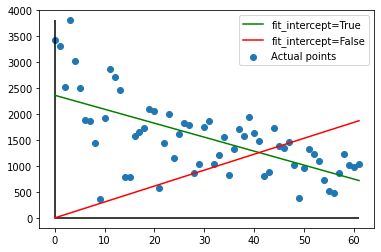

In [235]:

lr_fi_true = LinearRegression(fit_intercept=True)
lr_fi_false = LinearRegression(fit_intercept=False)

lr_fi_true.fit(x_feb, y_feb)
lr_fi_false.fit(x_feb, y_feb)

print('Intercept when fit_intercept=True : {:.5f}'.format(lr_fi_true.intercept_))
print('Intercept when fit_intercept=False : {:.5f}'.format(lr_fi_false.intercept_))

lr_fi_true_yhat = np.dot(x_feb, lr_fi_true.coef_) + lr_fi_true.intercept_
lr_fi_false_yhat = np.dot(x_feb, lr_fi_false.coef_) + lr_fi_false.intercept_

plt.scatter(x_feb, y_feb, label='Actual points')
plt.plot(x_feb, lr_fi_true_yhat, 'g-', label='fit_intercept=True')
plt.plot(x_feb, lr_fi_false_yhat, 'r-', label='fit_intercept=False')
plt.legend()

plt.vlines(0, 0, y_feb.max())
plt.hlines(0, x_feb.min(), x_feb.max())

plt.show()

## Analisa
Dari 3 Graf yang telah dilihat, melakukan centering dengan fit_intercept mengubah:
1. Arah/gradien dari garis *predictor* (misalkan garis y=x, atau ketika m pada rumus dasar regresi linear bernilai positif, nilai predictor akan berbanding lurus dengan nilai y terlihat pada garis merah dan sebaliknya apabila nilai m negatif, garis akan berbanding terbalik dengan nilai y (terlihat pada garis hijau).
2. nilai intercept (b) pada rumus dasar regresi linear. Dapat dilihat dari perhitungan di atas, nilai intercept ketika *fit_intercept = False* selalu 0. Hal ini dilakukan karena pada dasarnya kita *tuning* model kita untuk selalu mulai dari 0.

# 2. Scatter plot matrix dan korelasi

Klien meminta agar dibuatkan scatter plot matrix dan dicari nilai korelasi terhadap Positif Harian (Jakarta) (data diambil dari kolom Positif Harian (Jakarta) dari sheet Data Indonesia dan Jakarta) dengan:
<ul>
<li>Data Tes Harian, Positive Harian, dan Positivity Harian pada judul kolom Total DKI Jakarta dari sheet RDT Ag (Anti Gen)
<li>Data, Vaksinasi 1, Vaksinasi 2, Persentase 1, Persentase 2 pada judul kolom Tenaga Kesehatan, Lanjut Usia,<br> Pelayan Publik, dan Total untuk judul DKI dari sheet Vaksinasi

Analisa:
<li>Berdasarkan hasil scatter plot matriks dan nilai korelasi terhadap Positif Harian (Jakarta) yang sudah dilakukan, tentukan variabel apa yang paling berpengaruh terhadap penekanan laju pertambahan Positif Harian (Jakarta)<ul>


In [236]:
dataset2 = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta (3).xlsx','RDT Ag',skiprows=1) #Mengambil data sheet RDT Ag dan meloncati baris pertama
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 101 non-null    int64         
 1   Tgl                        101 non-null    datetime64[ns]
 2   Positif                    101 non-null    int64         
 3   Negatif                    101 non-null    int64         
 4   Total                      101 non-null    int64         
 5   Positivity Rate            101 non-null    float64       
 6   Positif.1                  101 non-null    int64         
 7   Negatif.1                  101 non-null    int64         
 8   Total.1                    101 non-null    int64         
 9   Positivity Rate.1          101 non-null    object        
 10  Positif.2                  101 non-null    int64         
 11  Negatif.2                  101 non-null    int64         
 12  Total.2 

In [237]:
pos_h_jkt = dataset.iloc[:,[0,19]] #Data positif harian jakarta
data_banding = dataset2.iloc[:,[1,14,15,17]] #Tanggal, Data Tes Harian, Positive Harian, dan Positivity Harian
data_banding

,Tgl,Tes Harian,Positif Harian,Positivity Rate Harian
0,2021-01-01,1192,76,0.0637584
1,2021-01-02,0,0,#DIV/0!
2,2021-01-03,607,24,0.0395387
3,2021-01-04,0,0,#DIV/0!
4,2021-01-05,0,0,#DIV/0!
...,...,...,...,...
96,2021-04-07,3665,74,0.020191
97,2021-04-08,4306,96,0.0222945
98,2021-04-09,4619,104,0.0225157
99,2021-04-10,4081,65,0.0159275


In [238]:
sheet1_awal = dataset[dataset["Tanggal"]=="2021-03-05"].index.values
sheet1_akhir = dataset[dataset["Tanggal"]=="2021-04-06"].index.values
sheet2_awal = dataset2[dataset2["Tgl"]=="2021-03-05"].index.values
sheet2_akhir = dataset2[dataset2["Tgl"]=="2021-04-06"].index.values

In [239]:
#Only activate waktu presentasi
test_sheet1_awal = dataset[dataset["Tanggal"]=="04/06/2021"].index.values
test_sheet1_akhir = dataset[dataset["Tanggal"]=="04/11/2021"].index.values
test_sheet2_awal = dataset2[dataset2["Tgl"]=="2021-04-06"].index.values
test_sheet2_akhir = dataset2[dataset2["Tgl"]=="2021-04-11"].index.values

In [240]:
import numpy as np
pos_h_jkt_train = pos_h_jkt[sheet1_awal[0]:sheet1_akhir[0]]
data_banding_train = data_banding[sheet2_awal[0]:sheet2_akhir[0]] #Ambil data banding sesuai tanggal
data_banding_train =data_banding_train.reset_index(drop=True) #Reset index
pos_h_jkt_train =pos_h_jkt_train.reset_index(drop=True)
len(pos_h_jkt_train)==len(data_banding_train)

True

In [241]:
#Only activate waktu presentasi
pos_h_jkt_test = pos_h_jkt[test_sheet1_awal[0]:test_sheet1_akhir[0]+1]
data_banding_test = data_banding[test_sheet2_awal[0]:test_sheet2_akhir[0]+1]
data_banding_test =data_banding_test.reset_index(drop=True)
pos_h_jkt_test=pos_h_jkt_test.reset_index(drop=True)
len(pos_h_jkt_test)==len(data_banding_test)

True

In [242]:
whole_data = data_banding_train.join(pos_h_jkt_train) #Menggabung data positif harian jkt dengan data banding
whole_data['Positivity Rate Harian']=whole_data['Positivity Rate Harian'].astype('float64') #mengubah tipe data positivity rate harian menjadi float karena sebelumnya dianggap object
whole_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Tgl                       32 non-null     datetime64[ns]
 1   Tes Harian                32 non-null     int64         
 2   Positif  Harian           32 non-null     int64         
 3   Positivity Rate Harian    32 non-null     float64       
 4   Tanggal                   32 non-null     datetime64[ns]
 5   Positif Harian (Jakarta)  32 non-null     int64         
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 1.6 KB


In [243]:
whole_data_test = data_banding_test.join(pos_h_jkt_test)
whole_data_test['Positivity Rate Harian']=whole_data_test['Positivity Rate Harian'].astype('float64')
whole_data_test

,Tgl,Tes Harian,Positif Harian,Positivity Rate Harian,Tanggal,Positif Harian (Jakarta)
0,2021-04-06,4373,75,0.017151,2021-04-06,487
1,2021-04-07,3665,74,0.020191,2021-04-07,862
2,2021-04-08,4306,96,0.022294,2021-04-08,1239
3,2021-04-09,4619,104,0.022516,2021-04-09,1013
4,2021-04-10,4081,65,0.015927,2021-04-10,977
5,2021-04-11,2550,59,0.023137,2021-04-11,1031


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87b256d650>,
      dtype=object)

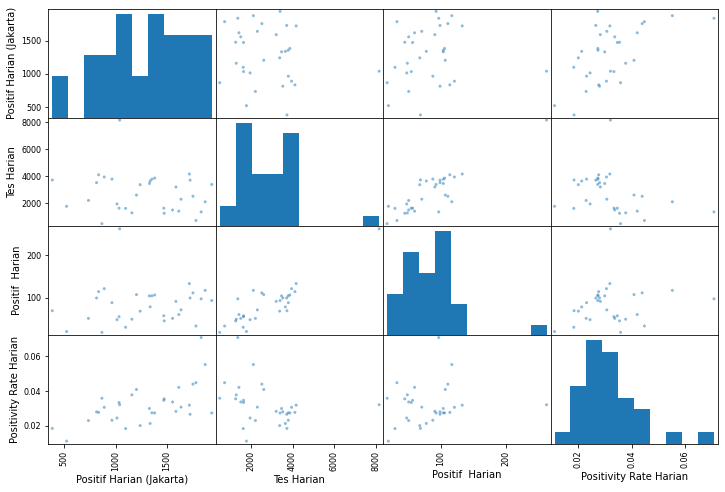

In [244]:
from pandas.plotting import scatter_matrix
attributes = ['Positif Harian (Jakarta)','Tes Harian', 'Positif  Harian','Positivity Rate Harian']
scatter_matrix(whole_data[attributes], figsize=(12,8))

In [245]:
whole_data.corr()["Positif Harian (Jakarta)"].sort_values(ascending=False)

Positif Harian (Jakarta)    1.000000
Positivity Rate Harian      0.588750
Positif  Harian             0.135881
Tes Harian                 -0.156879
Name: Positif Harian (Jakarta), dtype: float64

No.2 b

In [246]:
dataset2b = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta (3).xlsx','Vaksinasi',skiprows=4) #Mengambil dataset
dataset2b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          38 non-null     object 
 1   Target Vaksinasi    38 non-null     int64  
 2   Vaksinasi 1         38 non-null     int64  
 3   Vaksinasi 2         38 non-null     int64  
 4   Persentase 1        38 non-null     float64
 5   Persentase 2        38 non-null     float64
 6   Target Vaksinasi.1  38 non-null     int64  
 7   Vaksinasi 1.1       38 non-null     int64  
 8   Vaksinasi 2.1       38 non-null     int64  
 9   Persentase 1.1      38 non-null     float64
 10  Persentase 2.1      38 non-null     float64
 11  Target Vaksinasi.2  38 non-null     int64  
 12  Vaksinasi 1.2       38 non-null     int64  
 13  Vaksinasi 2.2       38 non-null     int64  
 14  Persentase 1.2      38 non-null     float64
 15  Persentase 2.2      38 non-null     float64
 16  Target Vak

In [247]:
data_banding2= dataset2b.iloc[:,[0,2,3,4,5,7,8,9,10,12,13,14,15,17,18,19,20]] #Mengambil data banding
data_banding2

,Unnamed: 0,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Vaksinasi 1.1,Vaksinasi 2.1,Persentase 1.1,Persentase 2.1,Vaksinasi 1.2,Vaksinasi 2.2,Persentase 1.2,Persentase 2.2,Vaksinasi 1.3,Vaksinasi 2.3,Persentase 1.3,Persentase 2.3
0,5 Maret 2021,141425,91078,1.259339,0.811017,76451,0,0.083862,0.000000,64121,0,0.032437,0.000000,281997,91078,0.093977,0.030352
1,6 Maret 2021,144046,91379,1.282678,0.813697,79421,0,0.087120,0.000000,66484,0,0.033633,0.000000,289951,91379,0.096628,0.030453
2,7 Maret 2021,177126,91460,1.577243,0.814418,83628,0,0.091734,0.000000,73752,2514,0.037310,0.001272,334506,93974,0.111476,0.031317
3,8 Maret 2021,181237,92988,1.613850,0.828025,95140,1,0.104362,0.000001,85333,3989,0.043168,0.002018,361710,96978,0.120542,0.032319
4,9 Maret 2021,113326,89984,1.009127,0.801275,135128,675,0.148227,0.000740,174685,29195,0.088369,0.014769,423139,119854,0.141014,0.039942
5,10 Maret 2021,116791,90681,1.039982,0.807482,154251,1100,0.169203,0.001207,202452,17773,0.102416,0.008991,473494,109554,0.157795,0.036510
6,11 Maret 2021,116823,90693,1.040267,0.807589,154915,1103,0.169932,0.001210,211754,17903,0.107122,0.009057,483492,109699,0.161127,0.036558
7,12 Maret 2021,118086,91521,1.051513,0.814962,167086,1291,0.183282,0.001416,234403,20226,0.118580,0.010232,519575,113038,0.173152,0.037671
8,13 Maret 2021,118283,91748,1.053268,0.816983,174327,1444,0.191225,0.001584,245355,21272,0.124120,0.010761,537965,114464,0.179280,0.038146
9,14 Maret 2021,118301,91764,1.053428,0.817125,179024,1444,0.196378,0.001584,252763,21413,0.127868,0.010832,550088,114621,0.183321,0.038198


In [248]:
data_banding2_train = data_banding2[:32] # Kita hanya ambil data sampai index ke 32 (pada tanggal 5 april)
data_banding2_train =data_banding2_train.reset_index(drop=True) #Reset index
pos_h_jkt_train =pos_h_jkt_train.reset_index(drop=True)
len(pos_h_jkt_train)==len(data_banding2_train)

True

In [249]:
data_banding2_test = data_banding2[32:]
data_banding2_test=data_banding2_test.reset_index(drop=True)
pos_h_jkt_test=pos_h_jkt_test.reset_index(drop=True)

In [250]:
whole_data2_train = data_banding2_train.join(pos_h_jkt_train)
whole_data2_train

,Unnamed: 0,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Vaksinasi 1.1,Vaksinasi 2.1,Persentase 1.1,Persentase 2.1,Vaksinasi 1.2,Vaksinasi 2.2,Persentase 1.2,Persentase 2.2,Vaksinasi 1.3,Vaksinasi 2.3,Persentase 1.3,Persentase 2.3,Tanggal,Positif Harian (Jakarta)
0,5 Maret 2021,141425,91078,1.259339,0.811017,76451,0,0.083862,0.000000,64121,0,0.032437,0.000000,281997,91078,0.093977,0.030352,2021-03-05,1159
1,6 Maret 2021,144046,91379,1.282678,0.813697,79421,0,0.087120,0.000000,66484,0,0.033633,0.000000,289951,91379,0.096628,0.030453,2021-03-06,1616
2,7 Maret 2021,177126,91460,1.577243,0.814418,83628,0,0.091734,0.000000,73752,2514,0.037310,0.001272,334506,93974,0.111476,0.031317,2021-03-07,1834
3,8 Maret 2021,181237,92988,1.613850,0.828025,95140,1,0.104362,0.000001,85333,3989,0.043168,0.002018,361710,96978,0.120542,0.032319,2021-03-08,1783
4,9 Maret 2021,113326,89984,1.009127,0.801275,135128,675,0.148227,0.000740,174685,29195,0.088369,0.014769,423139,119854,0.141014,0.039942,2021-03-09,867
5,10 Maret 2021,116791,90681,1.039982,0.807482,154251,1100,0.169203,0.001207,202452,17773,0.102416,0.008991,473494,109554,0.157795,0.036510,2021-03-10,1040
6,11 Maret 2021,116823,90693,1.040267,0.807589,154915,1103,0.169932,0.001210,211754,17903,0.107122,0.009057,483492,109699,0.161127,0.036558,2021-03-11,1754
7,12 Maret 2021,118086,91521,1.051513,0.814962,167086,1291,0.183282,0.001416,234403,20226,0.118580,0.010232,519575,113038,0.173152,0.037671,2021-03-12,1873
8,13 Maret 2021,118283,91748,1.053268,0.816983,174327,1444,0.191225,0.001584,245355,21272,0.124120,0.010761,537965,114464,0.179280,0.038146,2021-03-13,1034
9,14 Maret 2021,118301,91764,1.053428,0.817125,179024,1444,0.196378,0.001584,252763,21413,0.127868,0.010832,550088,114621,0.183321,0.038198,2021-03-14,1204


In [251]:
whole_data2_test = data_banding2_test.join(pos_h_jkt_test)
whole_data2_test

,Unnamed: 0,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Vaksinasi 1.1,Vaksinasi 2.1,Persentase 1.1,Persentase 2.1,Vaksinasi 1.2,Vaksinasi 2.2,Persentase 1.2,Persentase 2.2,Vaksinasi 1.3,Vaksinasi 2.3,Persentase 1.3,Persentase 2.3,Tanggal,Positif Harian (Jakarta)
0,2021-04-06 00:00:00,122326,106437,1.089269,0.947783,496569,124880,0.544704,0.136985,796248,349648,0.402805,0.176880,1415143,580965,0.471606,0.193611,2021-04-06,487
1,2021-04-07 00:00:00,122553,106800,1.091290,0.951016,500370,142698,0.548873,0.156530,813740,369813,0.411654,0.187081,1436663,619311,0.478778,0.206390,2021-04-07,862
2,2021-04-08 00:00:00,123061,107175,1.095814,0.954355,507667,148824,0.556878,0.163250,844961,388298,0.427448,0.196432,1475689,644297,0.491783,0.214716,2021-04-08,1239
3,2021-04-09 00:00:00,123387,107509,1.098717,0.957329,516816,166705,0.566914,0.182865,866503,402918,0.438346,0.203828,1506706,677132,0.502120,0.225659,2021-04-09,1013
4,2021-04-10 00:00:00,123474,107573,1.099492,0.957899,523861,173234,0.574641,0.190026,880884,406805,0.445621,0.205794,1528219,687612,0.509289,0.229151,2021-04-10,977
5,2021-04-11 00:00:00,123474,107573,1.099492,0.957899,523861,173234,0.574641,0.190026,880884,406805,0.445621,0.205794,1528219,687612,0.509289,0.229151,2021-04-11,1031


In [252]:
whole_data2_train = whole_data2_train.rename(columns={"Vaksinasi 1": "Vaksinasi 1 TK", "Vaksinasi 2": "Vaksinasi 2 TK","Persentase 1":"Persentase 1 TK","Persentase 2":"Persentase 2 TK","Vaksinasi 1.1": "Vaksinasi 1 Lan", "Vaksinasi 2.1": "Vaksinasi 2 Lan","Persentase 1.1":"Persentase 1 Lan","Persentase 2.1":"Persentase 2 Lan","Vaksinasi 1.2": "Vaksinasi 1 PP", "Vaksinasi 2.2": "Vaksinasi 2 PP","Persentase 1.2":"Persentase 1 PP","Persentase 2.2":"Persentase 2 PP", "Vaksinasi 1.3": "Vaksinasi 1 Tot", "Vaksinasi 2.3": "Vaksinasi 2 Tot","Persentase 1.3":"Persentase 1 Tot","Persentase 2.3":"Persentase 2 Tot"
                           })
whole_data2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                32 non-null     object        
 1   Vaksinasi 1 TK            32 non-null     int64         
 2   Vaksinasi 2 TK            32 non-null     int64         
 3   Persentase 1 TK           32 non-null     float64       
 4   Persentase 2 TK           32 non-null     float64       
 5   Vaksinasi 1 Lan           32 non-null     int64         
 6   Vaksinasi 2 Lan           32 non-null     int64         
 7   Persentase 1 Lan          32 non-null     float64       
 8   Persentase 2 Lan          32 non-null     float64       
 9   Vaksinasi 1 PP            32 non-null     int64         
 10  Vaksinasi 2 PP            32 non-null     int64         
 11  Persentase 1 PP           32 non-null     float64       
 12  Persentase 2 PP         

In [253]:
whole_data2_test = whole_data2_test.rename(columns={"Vaksinasi 1": "Vaksinasi 1 TK", "Vaksinasi 2": "Vaksinasi 2 TK","Persentase 1":"Persentase 1 TK","Persentase 2":"Persentase 2 TK","Vaksinasi 1.1": "Vaksinasi 1 Lan", "Vaksinasi 2.1": "Vaksinasi 2 Lan","Persentase 1.1":"Persentase 1 Lan","Persentase 2.1":"Persentase 2 Lan","Vaksinasi 1.2": "Vaksinasi 1 PP", "Vaksinasi 2.2": "Vaksinasi 2 PP","Persentase 1.2":"Persentase 1 PP","Persentase 2.2":"Persentase 2 PP", "Vaksinasi 1.3": "Vaksinasi 1 Tot", "Vaksinasi 2.3": "Vaksinasi 2 Tot","Persentase 1.3":"Persentase 1 Tot","Persentase 2.3":"Persentase 2 Tot"
                           })
whole_data2_test.info() #Cek tipe data dan cek jika ada data kosong

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                6 non-null      object        
 1   Vaksinasi 1 TK            6 non-null      int64         
 2   Vaksinasi 2 TK            6 non-null      int64         
 3   Persentase 1 TK           6 non-null      float64       
 4   Persentase 2 TK           6 non-null      float64       
 5   Vaksinasi 1 Lan           6 non-null      int64         
 6   Vaksinasi 2 Lan           6 non-null      int64         
 7   Persentase 1 Lan          6 non-null      float64       
 8   Persentase 2 Lan          6 non-null      float64       
 9   Vaksinasi 1 PP            6 non-null      int64         
 10  Vaksinasi 2 PP            6 non-null      int64         
 11  Persentase 1 PP           6 non-null      float64       
 12  Persentase 2 PP           

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87b240b250>,
      dtype=object)

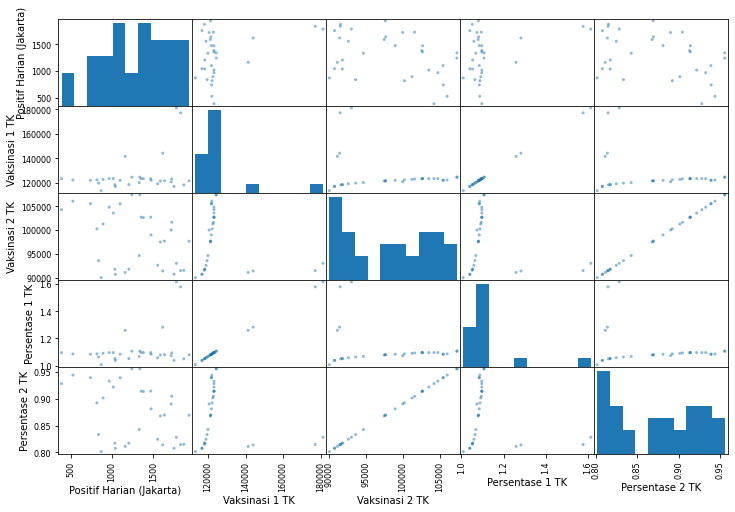

In [254]:
attributes = ['Positif Harian (Jakarta)','Vaksinasi 1 TK', 'Vaksinasi 2 TK','Persentase 1 TK',"Persentase 2 TK"]
scatter_matrix(whole_data2_train[attributes], figsize=(12,8)) #Membuat scatter matrix Tenaga kesehatan

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87b26a4450>,
      dtype=object)

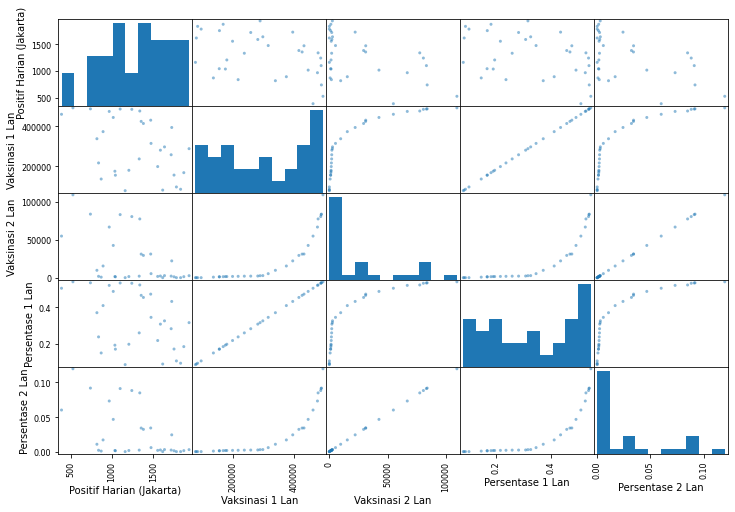

In [255]:
attributes = ['Positif Harian (Jakarta)','Vaksinasi 1 Lan', 'Vaksinasi 2 Lan','Persentase 1 Lan',"Persentase 2 Lan"]
scatter_matrix(whole_data2_train[attributes], figsize=(12,8)) #Membuat scatter matrix Lansia

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87b1692e10>,
      dtype=object)

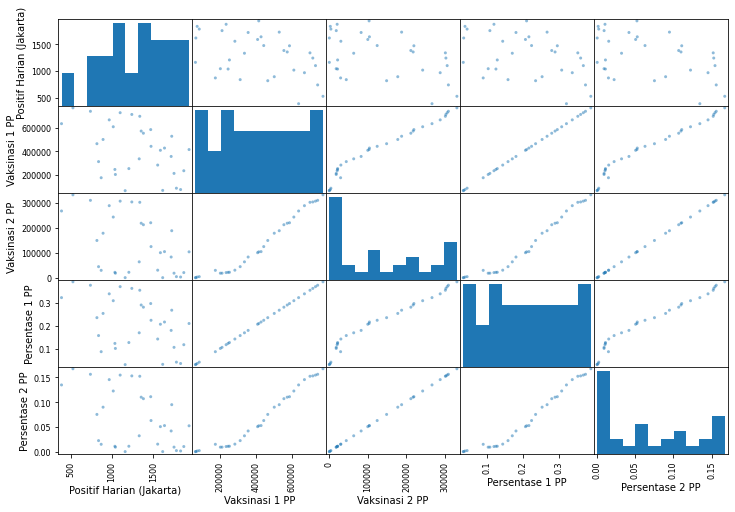

In [256]:
attributes = ['Positif Harian (Jakarta)','Vaksinasi 1 PP', 'Vaksinasi 2 PP','Persentase 1 PP',"Persentase 2 PP"]
scatter_matrix(whole_data2_train[attributes], figsize=(12,8)) #Membuat scatter matrix Pelayan Publik

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87b257e9d0>,
      dtype=object)

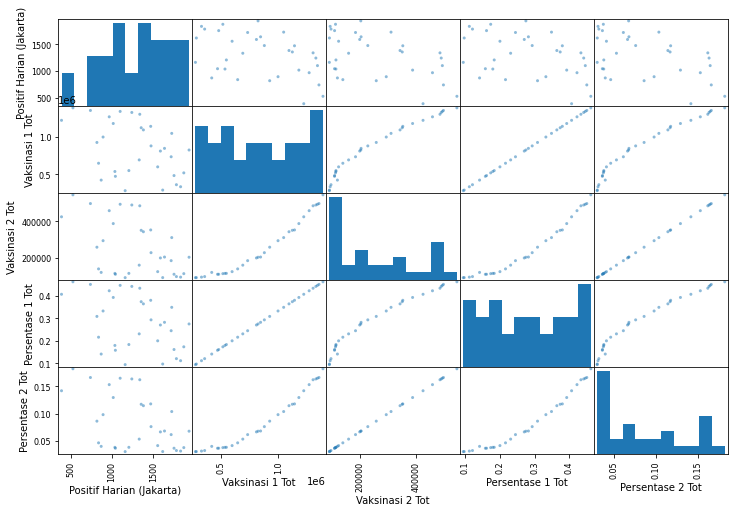

In [257]:
attributes = ['Positif Harian (Jakarta)','Vaksinasi 1 Tot', 'Vaksinasi 2 Tot','Persentase 1 Tot',"Persentase 2 Tot"]
scatter_matrix(whole_data2_train[attributes], figsize=(12,8)) #Membuat scatter matrix Total

In [258]:
whole_data2_train.corr()['Positif Harian (Jakarta)'].sort_values(ascending=False) #mencari nilai korelasi data pos harian jkt dengan data banding

Positif Harian (Jakarta)    1.000000
Persentase 1 TK             0.328659
Vaksinasi 1 TK              0.328659
Persentase 2 TK            -0.353885
Vaksinasi 2 TK             -0.353885
Persentase 1 Lan           -0.423823
Vaksinasi 1 Lan            -0.423823
Persentase 1 Tot           -0.425769
Vaksinasi 1 Tot            -0.425769
Persentase 1 PP            -0.437271
Vaksinasi 1 PP             -0.437271
Vaksinasi 2 PP             -0.464284
Persentase 2 PP            -0.464284
Vaksinasi 2 Tot            -0.477607
Persentase 2 Tot           -0.477607
Vaksinasi 2 Lan            -0.512772
Persentase 2 Lan           -0.512772
Name: Positif Harian (Jakarta), dtype: float64

## Kesimpulan:
Jadi korelasi yang paling menekan laju pertambahan Positif Harian Jakarta adalah Vaksinasi 2 Lansia. 

Secara visual, kelompok melihat semua data Vaksinasi 2 menurunkan Kasus Positif Harian Jakarta. Bagaimana signifikansi ini (seperti misalnya karena persentase korban covid cukup besar adalah lansia? atau yang mendapatkan dampakk terbesar dari vaksinasi dua tahap dst) tidak akan dilanjutkan oleh kelompok ini. 

# 3. Regression Models

In [259]:
whole_data2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                32 non-null     object        
 1   Vaksinasi 1 TK            32 non-null     int64         
 2   Vaksinasi 2 TK            32 non-null     int64         
 3   Persentase 1 TK           32 non-null     float64       
 4   Persentase 2 TK           32 non-null     float64       
 5   Vaksinasi 1 Lan           32 non-null     int64         
 6   Vaksinasi 2 Lan           32 non-null     int64         
 7   Persentase 1 Lan          32 non-null     float64       
 8   Persentase 2 Lan          32 non-null     float64       
 9   Vaksinasi 1 PP            32 non-null     int64         
 10  Vaksinasi 2 PP            32 non-null     int64         
 11  Persentase 1 PP           32 non-null     float64       
 12  Persentase 2 PP         

In [260]:
attributes = ["Vaksinasi 2 Lan", "Vaksinasi 2 TK", "Vaksinasi 2 Tot","Vaksinasi 2 PP","Vaksinasi 1 Lan" , "Vaksinasi 1 Tot", "Vaksinasi 1 PP"]
x_train = whole_data2_train[attributes].values
y_train = whole_data2_train["Positif Harian (Jakarta)"]
x_test = whole_data2_test[attributes].values
y_test = whole_data2_test["Positif Harian (Jakarta)"]


In [261]:
# x_test = whole_data2_test["Vaksinasi 2 Lan"]
# y_test = np.reshape(whole_data2_test["Positif Harian (Jakarta)"].values,(-1,1))

In [264]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor(random_state=69)
tree_reg.fit(x_train, y_train)
y_pred = tree_reg.predict(x_test)
print(mean_squared_error(y_test, y_pred)**(1/2))

226.77448416139472


### Gradient Boost

In [265]:
x_train = whole_data2_train[attributes].values
y_train = whole_data2_train["Positif Harian (Jakarta)"]
x_test = whole_data2_test[attributes].values
y_test = whole_data2_test["Positif Harian (Jakarta)"]

In [266]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

In [267]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(x_train, y_train)
y_pred = gbrt_slow.predict(x_test)
print(mean_squared_error(y_test, y_pred)**(1/2))

251.7852525710985


In [268]:
# gbrt_slow.score(x_test,y_test)

## Random Forest Regressor

In [269]:
x_train = whole_data2_train[attributes].values
y_train = whole_data2_train["Positif Harian (Jakarta)"]
x_test = whole_data2_test[attributes].values
y_test = whole_data2_test["Positif Harian (Jakarta)"]

In [270]:
from sklearn.ensemble import RandomForestRegressor
rnd_clf = RandomForestRegressor(n_estimators=100, random_state=69, max_depth=3)
rnd_clf.fit(x_train, y_train)
y_pred = rnd_clf.predict(x_test)
print(mean_squared_error(y_test, y_pred)**(1/2))

178.3266808476757


### Kesimpulan
Random Forest Regressor adalah model yang terbaik pada kasus ini karena memiliki nilai RMSE yang paling kecil

*   RMSE DecisionTreeRegressor: 226.77448416139472
*   RMSE GradientBoost: 251.7852525710985
*   RMSE RandomForestRegressor: 178.3266808476757



### 4. PCA

In [271]:
whole_data2_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                6 non-null      object        
 1   Vaksinasi 1 TK            6 non-null      int64         
 2   Vaksinasi 2 TK            6 non-null      int64         
 3   Persentase 1 TK           6 non-null      float64       
 4   Persentase 2 TK           6 non-null      float64       
 5   Vaksinasi 1 Lan           6 non-null      int64         
 6   Vaksinasi 2 Lan           6 non-null      int64         
 7   Persentase 1 Lan          6 non-null      float64       
 8   Persentase 2 Lan          6 non-null      float64       
 9   Vaksinasi 1 PP            6 non-null      int64         
 10  Vaksinasi 2 PP            6 non-null      int64         
 11  Persentase 1 PP           6 non-null      float64       
 12  Persentase 2 PP           

In [272]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
x_train = whole_data2_train[attributes].values
y_train = whole_data2_train["Positif Harian (Jakarta)"]
x_test = whole_data2_test[attributes].values
y_test = whole_data2_test["Positif Harian (Jakarta)"]
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [273]:
rnd_clf = RandomForestRegressor(n_estimators=100, random_state=69, max_depth=3)
rnd_clf.fit(x_train, y_train)
y_pred = rnd_clf.predict(x_test)

In [274]:
x=mean_squared_error(y_test, y_pred)
print(x**(1/2))

273.08355247660603


In [275]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=69)
gbrt_slow.fit(x_train, y_train)
y_pred = gbrt_slow.predict(x_test)

In [276]:
y=mean_squared_error(y_test, y_pred)
print(y**(1/2))

551.5943895559307


In [277]:
tree_reg = DecisionTreeRegressor(random_state=69, max_depth=4)
tree_reg.fit(x_train, y_train)
y_pred = tree_reg.predict(x_test)

In [278]:
z=mean_squared_error(y_test, y_pred)
print(z**(1/2))

471.37264098234067


## Analisa
Hasil RMSE dengan menggunakan PCA semakin buruk. Kelompok kami cuman dapat berspekulasi bahwa dalam mereduksi dimensi, terdapat beberapa data yang tidak tereduksi dengan baik sehingga menurunkan akurasi. 

### 5. Tambahkan kolom Kelas

> Pada soal ini, kelompok diminta untuk menambahkan sebuah kolom "Kelas" berdasarkan nilai Positivity Rate Harian pada dataset. 



---



In [279]:
whole_data2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                32 non-null     object        
 1   Vaksinasi 1 TK            32 non-null     int64         
 2   Vaksinasi 2 TK            32 non-null     int64         
 3   Persentase 1 TK           32 non-null     float64       
 4   Persentase 2 TK           32 non-null     float64       
 5   Vaksinasi 1 Lan           32 non-null     int64         
 6   Vaksinasi 2 Lan           32 non-null     int64         
 7   Persentase 1 Lan          32 non-null     float64       
 8   Persentase 2 Lan          32 non-null     float64       
 9   Vaksinasi 1 PP            32 non-null     int64         
 10  Vaksinasi 2 PP            32 non-null     int64         
 11  Persentase 1 PP           32 non-null     float64       
 12  Persentase 2 PP         

In [280]:
dataset_train_lengkap = whole_data.join(whole_data2_train,lsuffix='_left')
dataset_train_lengkap

,Tgl,Tes Harian,Positif Harian,Positivity Rate Harian,Tanggal_left,Positif Harian (Jakarta)_left,Unnamed: 0,Vaksinasi 1 TK,Vaksinasi 2 TK,Persentase 1 TK,Persentase 2 TK,Vaksinasi 1 Lan,Vaksinasi 2 Lan,Persentase 1 Lan,Persentase 2 Lan,Vaksinasi 1 PP,Vaksinasi 2 PP,Persentase 1 PP,Persentase 2 PP,Vaksinasi 1 Tot,Vaksinasi 2 Tot,Persentase 1 Tot,Persentase 2 Tot,Tanggal,Positif Harian (Jakarta)
0,2021-03-05,1297,49,0.037779,2021-03-05,1159,5 Maret 2021,141425,91078,1.259339,0.811017,76451,0,0.083862,0.000000,64121,0,0.032437,0.000000,281997,91078,0.093977,0.030352,2021-03-05,1159
1,2021-03-06,1425,60,0.042105,2021-03-06,1616,6 Maret 2021,144046,91379,1.282678,0.813697,79421,0,0.087120,0.000000,66484,0,0.033633,0.000000,289951,91379,0.096628,0.030453,2021-03-06,1616
2,2021-03-07,1371,97,0.070751,2021-03-07,1834,7 Maret 2021,177126,91460,1.577243,0.814418,83628,0,0.091734,0.000000,73752,2514,0.037310,0.001272,334506,93974,0.111476,0.031317,2021-03-07,1834
3,2021-03-08,737,33,0.044776,2021-03-08,1783,8 Maret 2021,181237,92988,1.613850,0.828025,95140,1,0.104362,0.000001,85333,3989,0.043168,0.002018,361710,96978,0.120542,0.032319,2021-03-08,1783
4,2021-03-09,502,18,0.035857,2021-03-09,867,9 Maret 2021,113326,89984,1.009127,0.801275,135128,675,0.148227,0.000740,174685,29195,0.088369,0.014769,423139,119854,0.141014,0.039942,2021-03-09,867
5,2021-03-10,8160,262,0.032108,2021-03-10,1040,10 Maret 2021,116791,90681,1.039982,0.807482,154251,1100,0.169203,0.001207,202452,17773,0.102416,0.008991,473494,109554,0.157795,0.036510,2021-03-10,1040
6,2021-03-11,2526,111,0.043943,2021-03-11,1754,11 Maret 2021,116823,90693,1.040267,0.807589,154915,1103,0.169932,0.001210,211754,17903,0.107122,0.009057,483492,109699,0.161127,0.036558,2021-03-11,1754
7,2021-03-12,2119,117,0.055215,2021-03-12,1873,12 Maret 2021,118086,91521,1.051513,0.814962,167086,1291,0.183282,0.001416,234403,20226,0.118580,0.010232,519575,113038,0.173152,0.037671,2021-03-12,1873
8,2021-03-13,1647,55,0.033394,2021-03-13,1034,13 Maret 2021,118283,91748,1.053268,0.816983,174327,1444,0.191225,0.001584,245355,21272,0.124120,0.010761,537965,114464,0.179280,0.038146,2021-03-13,1034
9,2021-03-14,2617,107,0.040887,2021-03-14,1204,14 Maret 2021,118301,91764,1.053428,0.817125,179024,1444,0.196378,0.001584,252763,21413,0.127868,0.010832,550088,114621,0.183321,0.038198,2021-03-14,1204


Kita menggunakan looping untuk memeriksa kondisi kolom Positivity Rate Harian dan memberikan nilai 0,1,2 berdasarkan kriteria yang telah diberikan

In [281]:
dataset_train_lengkap["Kelas"] = 0
for i in range(len(dataset_train_lengkap)):
    if dataset_train_lengkap["Positivity Rate Harian"][i] < 0.033:
        dataset_train_lengkap["Kelas"][i] = 0
    elif dataset_train_lengkap["Positivity Rate Harian"][i] > 0.05:
        dataset_train_lengkap["Kelas"][i] = 2
    else:
        dataset_train_lengkap["Kelas"][i] = 1
dataset_train_lengkap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Tgl,Tes Harian,Positif Harian,Positivity Rate Harian,Tanggal_left,Positif Harian (Jakarta)_left,Unnamed: 0,Vaksinasi 1 TK,Vaksinasi 2 TK,Persentase 1 TK,Persentase 2 TK,Vaksinasi 1 Lan,Vaksinasi 2 Lan,Persentase 1 Lan,Persentase 2 Lan,Vaksinasi 1 PP,Vaksinasi 2 PP,Persentase 1 PP,Persentase 2 PP,Vaksinasi 1 Tot,Vaksinasi 2 Tot,Persentase 1 Tot,Persentase 2 Tot,Tanggal,Positif Harian (Jakarta),Kelas
0,2021-03-05,1297,49,0.037779,2021-03-05,1159,5 Maret 2021,141425,91078,1.259339,0.811017,76451,0,0.083862,0.000000,64121,0,0.032437,0.000000,281997,91078,0.093977,0.030352,2021-03-05,1159,1
1,2021-03-06,1425,60,0.042105,2021-03-06,1616,6 Maret 2021,144046,91379,1.282678,0.813697,79421,0,0.087120,0.000000,66484,0,0.033633,0.000000,289951,91379,0.096628,0.030453,2021-03-06,1616,1
2,2021-03-07,1371,97,0.070751,2021-03-07,1834,7 Maret 2021,177126,91460,1.577243,0.814418,83628,0,0.091734,0.000000,73752,2514,0.037310,0.001272,334506,93974,0.111476,0.031317,2021-03-07,1834,2
3,2021-03-08,737,33,0.044776,2021-03-08,1783,8 Maret 2021,181237,92988,1.613850,0.828025,95140,1,0.104362,0.000001,85333,3989,0.043168,0.002018,361710,96978,0.120542,0.032319,2021-03-08,1783,1
4,2021-03-09,502,18,0.035857,2021-03-09,867,9 Maret 2021,113326,89984,1.009127,0.801275,135128,675,0.148227,0.000740,174685,29195,0.088369,0.014769,423139,119854,0.141014,0.039942,2021-03-09,867,1
5,2021-03-10,8160,262,0.032108,2021-03-10,1040,10 Maret 2021,116791,90681,1.039982,0.807482,154251,1100,0.169203,0.001207,202452,17773,0.102416,0.008991,473494,109554,0.157795,0.036510,2021-03-10,1040,0
6,2021-03-11,2526,111,0.043943,2021-03-11,1754,11 Maret 2021,116823,90693,1.040267,0.807589,154915,1103,0.169932,0.001210,211754,17903,0.107122,0.009057,483492,109699,0.161127,0.036558,2021-03-11,1754,1
7,2021-03-12,2119,117,0.055215,2021-03-12,1873,12 Maret 2021,118086,91521,1.051513,0.814962,167086,1291,0.183282,0.001416,234403,20226,0.118580,0.010232,519575,113038,0.173152,0.037671,2021-03-12,1873,2
8,2021-03-13,1647,55,0.033394,2021-03-13,1034,13 Maret 2021,118283,91748,1.053268,0.816983,174327,1444,0.191225,0.001584,245355,21272,0.124120,0.010761,537965,114464,0.179280,0.038146,2021-03-13,1034,1
9,2021-03-14,2617,107,0.040887,2021-03-14,1204,14 Maret 2021,118301,91764,1.053428,0.817125,179024,1444,0.196378,0.001584,252763,21413,0.127868,0.010832,550088,114621,0.183321,0.038198,2021-03-14,1204,1


Hal yang sama dilakukan untuk dataset test

In [282]:
dataset_test_lengkap = whole_data_test.join(whole_data2_test,lsuffix='_left')


In [283]:
dataset_test_lengkap["Kelas"] = 0
for i in range(len(dataset_test_lengkap)):
    if dataset_test_lengkap["Positivity Rate Harian"][i] < 0.033:
        dataset_test_lengkap["Kelas"][i] = 0
    elif dataset_test_lengkap["Positivity Rate Harian"][i] > 0.05:
        dataset_test_lengkap["Kelas"][i] = 2
    else:
        dataset_test_lengkap["Kelas"][i] = 1
dataset_test_lengkap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Tgl,Tes Harian,Positif Harian,Positivity Rate Harian,Tanggal_left,Positif Harian (Jakarta)_left,Unnamed: 0,Vaksinasi 1 TK,Vaksinasi 2 TK,Persentase 1 TK,Persentase 2 TK,Vaksinasi 1 Lan,Vaksinasi 2 Lan,Persentase 1 Lan,Persentase 2 Lan,Vaksinasi 1 PP,Vaksinasi 2 PP,Persentase 1 PP,Persentase 2 PP,Vaksinasi 1 Tot,Vaksinasi 2 Tot,Persentase 1 Tot,Persentase 2 Tot,Tanggal,Positif Harian (Jakarta),Kelas
0,2021-04-06,4373,75,0.017151,2021-04-06,487,2021-04-06 00:00:00,122326,106437,1.089269,0.947783,496569,124880,0.544704,0.136985,796248,349648,0.402805,0.176880,1415143,580965,0.471606,0.193611,2021-04-06,487,0
1,2021-04-07,3665,74,0.020191,2021-04-07,862,2021-04-07 00:00:00,122553,106800,1.091290,0.951016,500370,142698,0.548873,0.156530,813740,369813,0.411654,0.187081,1436663,619311,0.478778,0.206390,2021-04-07,862,0
2,2021-04-08,4306,96,0.022294,2021-04-08,1239,2021-04-08 00:00:00,123061,107175,1.095814,0.954355,507667,148824,0.556878,0.163250,844961,388298,0.427448,0.196432,1475689,644297,0.491783,0.214716,2021-04-08,1239,0
3,2021-04-09,4619,104,0.022516,2021-04-09,1013,2021-04-09 00:00:00,123387,107509,1.098717,0.957329,516816,166705,0.566914,0.182865,866503,402918,0.438346,0.203828,1506706,677132,0.502120,0.225659,2021-04-09,1013,0
4,2021-04-10,4081,65,0.015927,2021-04-10,977,2021-04-10 00:00:00,123474,107573,1.099492,0.957899,523861,173234,0.574641,0.190026,880884,406805,0.445621,0.205794,1528219,687612,0.509289,0.229151,2021-04-10,977,0
5,2021-04-11,2550,59,0.023137,2021-04-11,1031,2021-04-11 00:00:00,123474,107573,1.099492,0.957899,523861,173234,0.574641,0.190026,880884,406805,0.445621,0.205794,1528219,687612,0.509289,0.229151,2021-04-11,1031,0


## 6. Voting Classifier
Indonesia cinta demokrasi

In [284]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

y_train = dataset_train_lengkap["Kelas"]
y_test = dataset_test_lengkap["Kelas"]

x_train = dataset_train_lengkap.drop(["Kelas","Tgl","Unnamed: 0","Tanggal_left","Tanggal","Persentase 1 TK","Persentase 2 TK","Persentase 1 PP","Persentase 2 PP","Persentase 1 Lan","Persentase 2 Lan","Persentase 1 Tot","Persentase 2 Tot"],axis=1,inplace=False)
x_test = dataset_test_lengkap.drop(["Kelas","Tgl","Unnamed: 0","Tanggal_left","Tanggal","Persentase 1 TK","Persentase 2 TK","Persentase 1 PP","Persentase 2 PP","Persentase 1 Lan","Persentase 2 Lan","Persentase 1 Tot","Persentase 2 Tot"],axis=1,inplace=False)

logic = LogisticRegression(random_state = 0)
random_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)
voting_clf = VotingClassifier(
    estimators=[('lr', logic), ('rf', random_clf), ('svc', svm_clf)],
    voting='hard')
y_train

0     1
1     1
2     2
3     1
4     1
5     0
6     1
7     2
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
Name: Kelas, dtype: int64

In [285]:
voting_clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                

In [286]:
from sklearn.metrics import accuracy_score

for clf in (logic, random_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred), mean_squared_error(y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 1.0 0.0
RandomForestClassifier 1.0 0.0
SVC 1.0 0.0
VotingClassifier 1.0 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [287]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                             algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(x_train, y_train)
y_pred = ada_clf.predict(x_test)
accuracy_score(y_test, y_pred)
mean_squared_error(y_test, y_pred)

0.0

## Analisa
Dilihat dari accuracy score, semuanya memberikan hasil maksimal (1). Sehingga tidak dapat dibandingkan manakah model classifier yang paling baik. 

Dilihat dari segi MSE pun memberikan hasil terbaik (0). Sehingga tidak dapat dibandingkan manakah model classifier yang paling baik. 